In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
trainSplit = int(0.8 * len(X))
X_train, y_train = X[:trainSplit], y[:trainSplit]
X_test, y_test = X[trainSplit:], y[trainSplit:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plotPredictions(trainData, trainLabels, testData, testLabels, predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(trainData, trainLabels, c="b", s=4, label="Training Data")

  plt.scatter(testData, testLabels, c="g", s=4, label="Test Data")

  if predictions is not None:
    plt.scatter(testData, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})

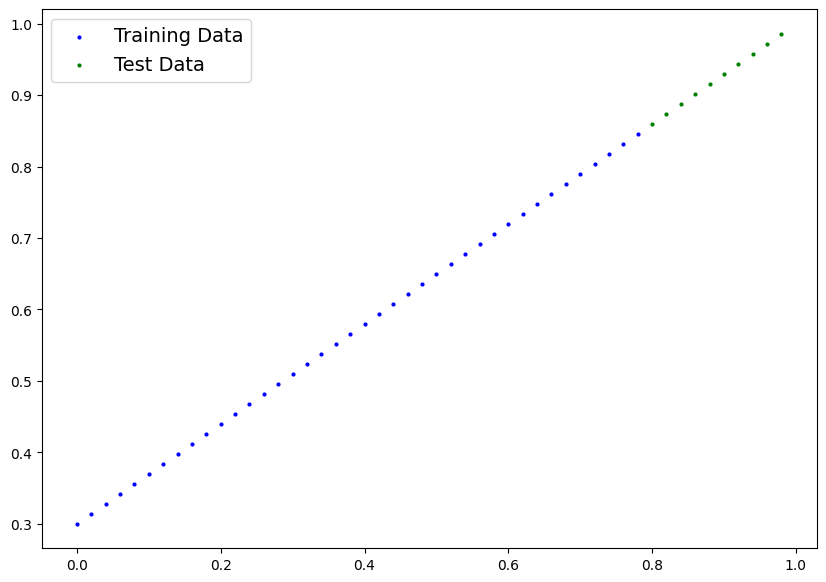

In [6]:
plotPredictions(X_train, y_train, X_test, y_test)

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)
model1 = LinearRegressionModel()
list(model1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
  y_preds = model1(X_test)

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


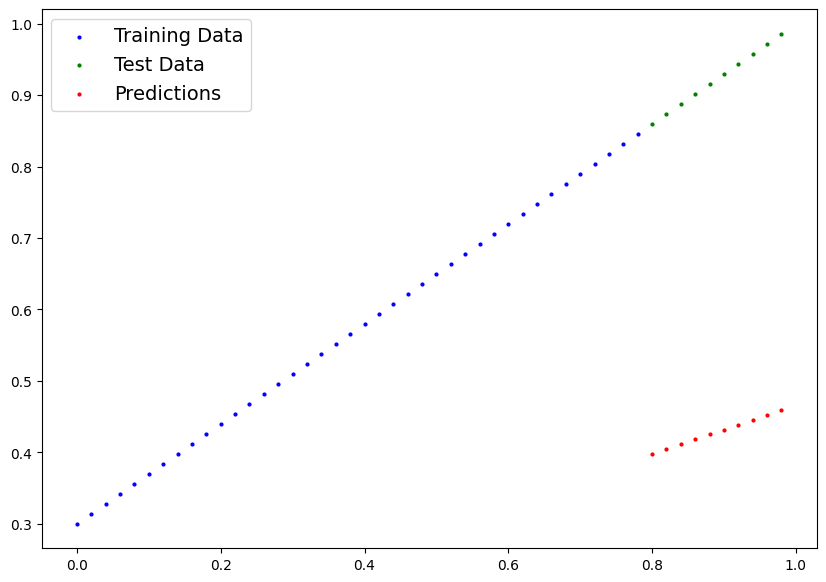

In [12]:
plotPredictions(X_train, y_train, X_test, y_test, y_preds)

In [13]:
lossFunc = nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.01)

In [14]:
torch.manual_seed(42)

epochs = 200

trainLossValues = []
testLossValues = []
epochCount = []

for epoch in range(epochs):
  model1.train()
  y_pred = model1(X_train)
  loss = lossFunc(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_pred = model1(X_test)
    test_loss = lossFunc(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epochCount.append(epoch)
      trainLossValues.append(loss.detach().numpy())
      testLossValues.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495 
Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428 
Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688 
Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703 
Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106 
Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024 
Epoch: 60 | Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135 
Epoch: 70 | Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519 
Epoch: 80 | Train Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484 
Epoch: 90 | Train Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819 
Epoch: 100 | Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262 
Epoch: 110 | Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466 
Epoch: 120 | Train Loss: 0.01758546568453312 | Test Loss: 0.040

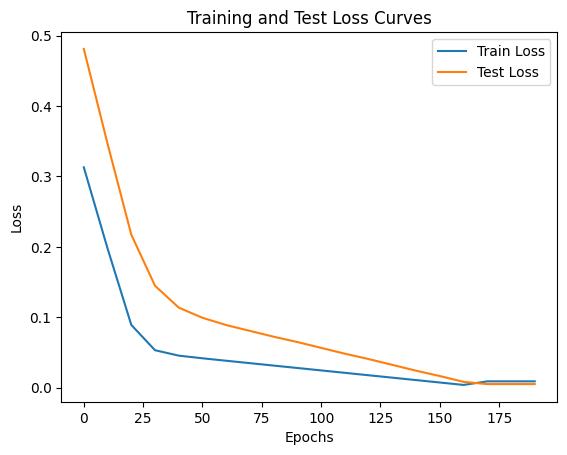

In [15]:
def plotLoss(epochCount, trainLoss, testLoss):
  plt.plot(epochCount, trainLoss, label="Train Loss")
  plt.plot(epochCount, testLoss, label="Test Loss")
  plt.title("Training and Test Loss Curves")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

plotLoss(epochCount, trainLossValues, testLossValues)

In [16]:
model1.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [17]:
model1.eval()

with torch.inference_mode():
  y_preds = model1(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

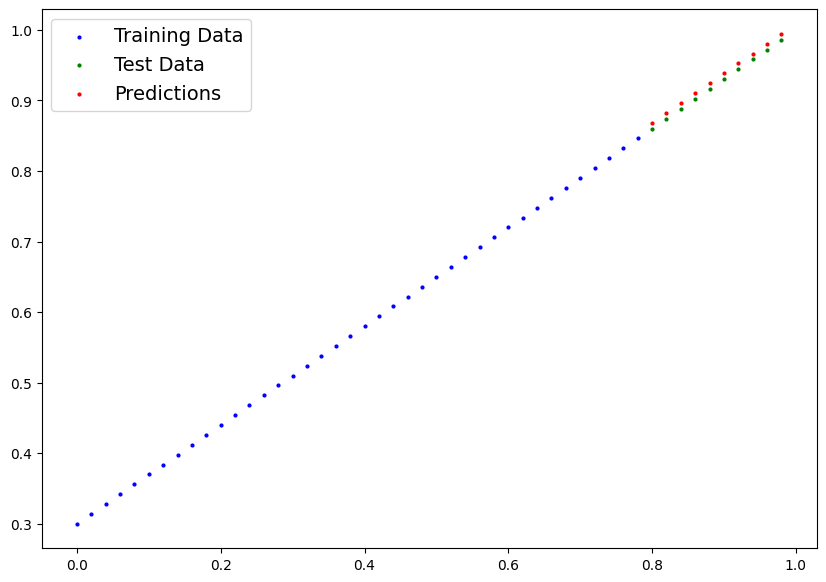

In [18]:
plotPredictions(X_train, y_train, X_test, y_test, y_preds)

In [19]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_linear_model.pth"
model_save_path = model_path / model_name

torch.save(obj=model1.state_dict(), f=model_save_path)

In [20]:
loadedModel = LinearRegressionModel()
loadedModel.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [21]:
loadedModel.eval()

with torch.inference_mode():
  loadedModelPreds = loadedModel(X_test)

loadedModelPreds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# **EXERCISE**

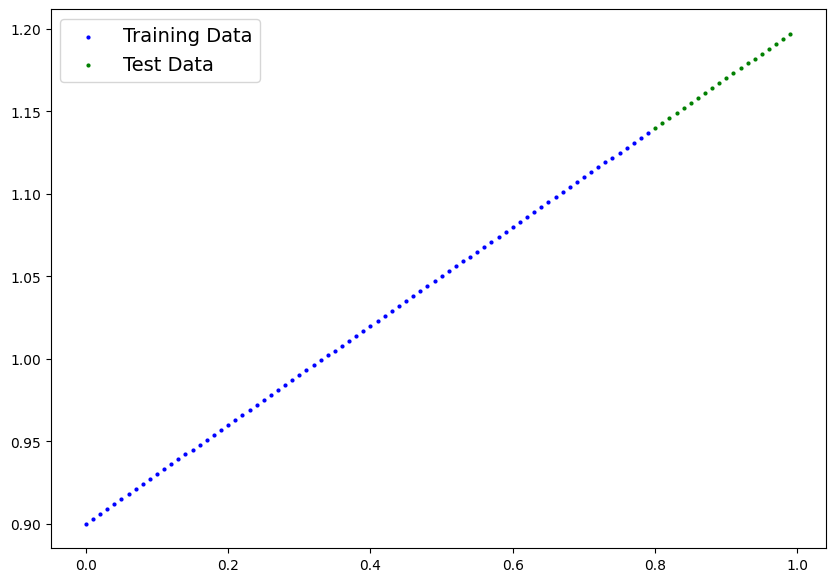

In [54]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

totalDatasetSize = (end - start) / step
trainDatasetSize = int(totalDatasetSize * 0.8)

X_train, y_train = X[:trainDatasetSize], y[:trainDatasetSize]
X_test, y_test = X[trainDatasetSize:], y[trainDatasetSize:]

plotPredictions(X_train, y_train, X_test, y_test)

In [55]:
class ExerciseModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias

exerciseModel = ExerciseModel()
exerciseModel.state_dict()

OrderedDict([('weights', tensor([1.1103])), ('bias', tensor([-1.6898]))])

In [56]:
lossFunction = nn.L1Loss()
SGDOptimizer = torch.optim.SGD(params=exerciseModel.parameters(), lr=0.01)

epochs = 300

for epoch in range(epochs):
  exerciseModel.train()

  y_pred = exerciseModel(X_train)
  loss = lossFunction(y_pred, y_train)
  SGDOptimizer.zero_grad()
  loss.backward()
  SGDOptimizer.step()

  if epoch % 20 == 0:
    exerciseModel.eval()
    with torch.inference_mode():
      test_pred = exerciseModel(X_test)
      test_loss = lossFunction(test_pred, y_test.type(torch.float))
      print(f"{epoch} | {epochs} : Loss {test_loss}")

0 | 300 : Loss 1.8510539531707764
20 | 300 : Loss 1.580349087715149
40 | 300 : Loss 1.309644103050232
60 | 300 : Loss 1.0389394760131836
80 | 300 : Loss 0.7682346105575562
100 | 300 : Loss 0.49752989411354065
120 | 300 : Loss 0.2268250435590744
140 | 300 : Loss 0.0753733441233635
160 | 300 : Loss 0.28767460584640503
180 | 300 : Loss 0.43443769216537476
200 | 300 : Loss 0.5217200517654419
220 | 300 : Loss 0.5729405283927917
240 | 300 : Loss 0.6005923748016357
260 | 300 : Loss 0.6139792799949646
280 | 300 : Loss 0.6171366572380066


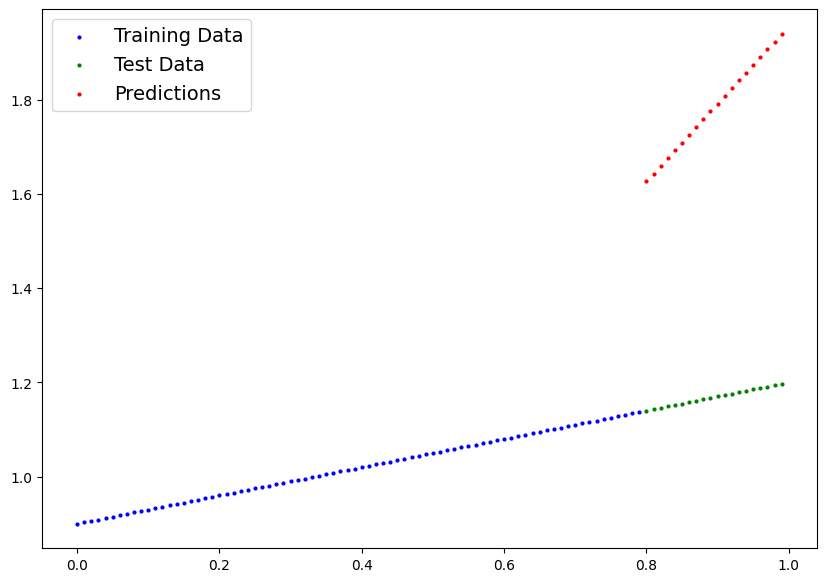

In [57]:
exerciseModel.eval()
with torch.inference_mode():
  y_pred = exerciseModel(X_test)

plotPredictions(X_train, y_train, X_test, y_test, y_pred)

In [58]:
from pathlib import Path

modelPath = Path("models")
modelPath.mkdir(parents=True, exist_ok=True)

modelPath = modelPath / "exercise_model.pth"

torch.save(obj=exerciseModel.state_dict(), f=modelPath)

exerciseLoadModel = ExerciseModel()
exerciseLoadModel.load_state_dict(torch.load(f=modelPath))

exerciseLoadModel.eval()
with torch.inference_mode():
  load_y_preds = exerciseLoadModel(X_test)

y_pred == load_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])